There are statistics for 2016 on the number of sick days for employees of different ages and gender.

It is planned to introduce additional medical examinations among risk groups. To identify these groups, it is necessary to test the following hypotheses:

1. Men miss more than 2 working days due to illness during the year significantly more often than women.
2. Employees over 35 years of age miss more than 2 working days due to illness during the year significantly more often than their younger colleagues.

In [1]:
Sys.setenv(LANG = "en")
library("broom")
library("ggplot2")
options(warn=0)

In [2]:
stat16 <- read.csv(file="logit_stat16 copy.csv", header=TRUE, sep=",", stringsAsFactors = TRUE) # чтобы не было проблем с загрузкой пришлось пересохранить файл с кодировкой "UTF-8"

In [3]:
head(stat16)

,Qabs,Age,Male
,<int>,<int>,<int>
1,5,39,0
2,4,54,1
3,4,26,1
4,5,42,1
5,4,29,1
6,4,38,1


In [4]:
dim(stat16)

[1] 237   3

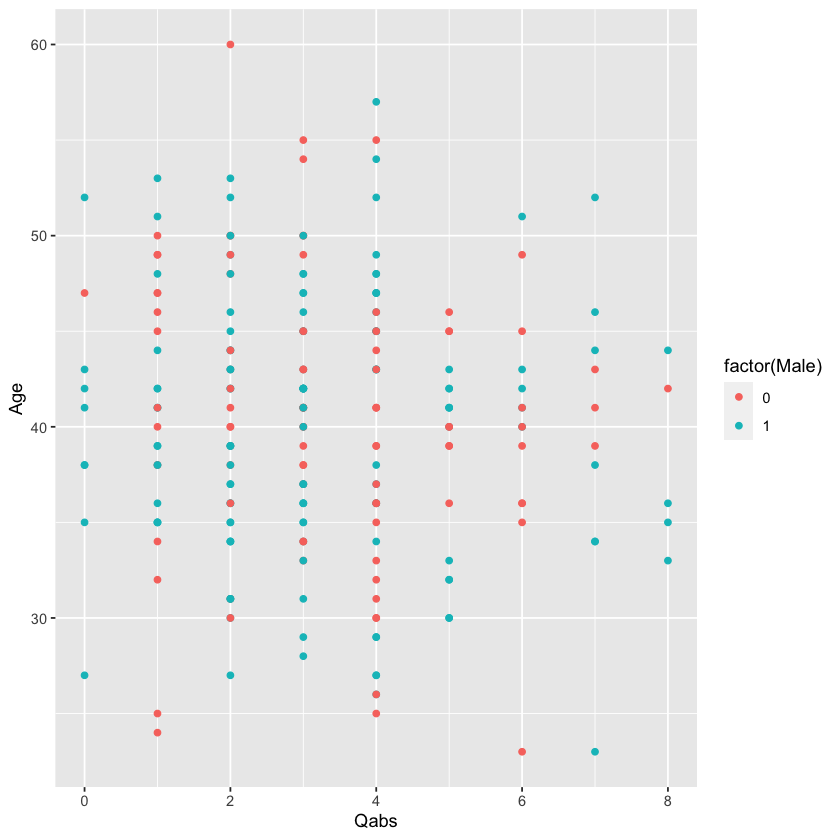

In [5]:
ggplot(stat16) + 
  geom_point(aes(x = Qabs, y = Age, color = factor(Male)))  

In [6]:
lm_model <- lm(Qabs ~ Age + Male + Male*Age, data = stat16) # оцениваем модель
report <- summary(lm_model) # создаём отчет по модели
report # выводим отчет на экран


Call:
lm(formula = Qabs ~ Age + Male + Male * Age, data = stat16)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3447 -1.2425 -0.1658  0.8981  4.8725 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.70763    1.08093   4.355 1.99e-05 ***
Age         -0.03303    0.02625  -1.258    0.210    
Male        -1.01793    1.41760  -0.718    0.473    
Age:Male     0.02025    0.03468   0.584    0.560    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.81 on 233 degrees of freedom
Multiple R-squared:  0.01069,	Adjusted R-squared:  -0.002048 
F-statistic: 0.8392 on 3 and 233 DF,  p-value: 0.4736


In [7]:
lm_model$coefficients

(Intercept)         Age        Male    Age:Male 
 4.70763248 -0.03302690 -1.01793116  0.02024859

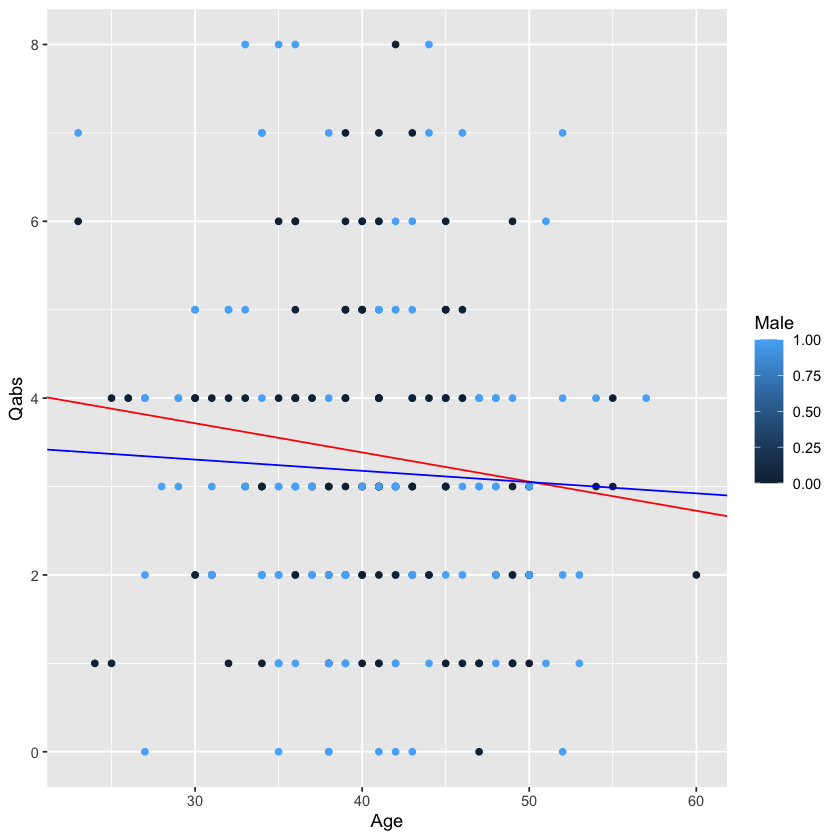

In [8]:
ggplot(stat16) + 
  geom_point(aes(x = Age, y = Qabs, color = Male)) +
  geom_abline(slope = lm_model$coefficients[2], intercept = lm_model$coefficients[1], colour='red')  +
  geom_abline(slope = lm_model$coefficients[2] + lm_model$coefficients[4]  , intercept = lm_model$coefficients[1] + lm_model$coefficients[3]  , colour='blue' )  


Obviously, multiple regression is not suitable for analysis here, the coefficients in the model are insignificant and we will not be able to obtain statistically significant conclusions here

Let's move on to multinomial logistic regression, which is more suitable for discrete explained variables.

Given the questions that interest us in the study, it makes sense to move to a binary explained variable:


$$y_i = \begin{cases} 0, \text{if no more than 2 days are missed} \\ 1 , \text{if more than 2 days are missed} \end{cases}$$

We also introduce an age dummy:

$$ x_i = \begin{cases} 0, \text{if not over 35} \\ 1 , \text{if over 35} \end{cases}$$

In [9]:
stat16['Age.dummy']  <-  as.factor(as.numeric(stat16$Age > 35))
stat16['Q.dummy']  <- as.numeric(stat16$Qabs > 2) 


In [69]:
m_logit <- glm(Q.dummy ~ Age + Age.dummy + Male ,
          data = stat16,
          family = binomial(link = "logit"))

In [63]:
m_probit <- glm(Q.dummy ~ Age + Age.dummy + Male,
          data = stat16,
          family = binomial(link = "probit"))

In [67]:
m_logit <- glm(Q.dummy ~ Age  + Male ,
          data = stat16,
          family = binomial(link = "logit"))

In [70]:
summary(m_logit)


Call:
glm(formula = Q.dummy ~ Age + Age.dummy + Male, family = binomial(link = "logit"), 
    data = stat16)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.80524    0.97092   1.859    0.063 .
Age         -0.03308    0.02912  -1.136    0.256  
Age.dummy1   0.38745    0.47050   0.824    0.410  
Male        -0.34134    0.28000  -1.219    0.223  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 310.49  on 236  degrees of freedom
Residual deviance: 307.63  on 233  degrees of freedom
AIC: 315.63

Number of Fisher Scoring iterations: 4


In [66]:
summary(m_probit)


Call:
glm(formula = Q.dummy ~ Age + Age.dummy + Male, family = binomial(link = "probit"), 
    data = stat16)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.11902    0.59627   1.877   0.0606 .
Age         -0.02048    0.01795  -1.141   0.2537  
Age.dummy1   0.24042    0.28950   0.830   0.4063  
Male        -0.21141    0.17144  -1.233   0.2175  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 310.49  on 236  degrees of freedom
Residual deviance: 307.61  on 233  degrees of freedom
AIC: 315.61

Number of Fisher Scoring iterations: 4


In [31]:
tidy(m_logit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.80524358,0.97091959,1.8593132,0.06298276
Age,-0.03307732,0.02912441,-1.1357248,0.25607177
Age.dummy1,0.38745383,0.47049626,0.8235003,0.41022352
Male,-0.34133562,0.27999999,-1.2190558,0.22282300


In [32]:
tidy(m_probit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.867943759,0.51505102,1.6851607,0.09195756
Age,-0.009568964,0.01221744,-0.7832214,0.43349709
Male,-0.221261244,0.17075032,-1.2958175,0.19503837


In [33]:
vcov(m_logit)

,(Intercept),Age,Age.dummy1,Male
(Intercept),0.94268486,-0.0265188358,0.233421598,-0.0508748052
Age,-0.02651884,0.0008482315,-0.010086316,-0.0001057922
Age.dummy1,0.23342160,-0.0100863157,0.221366728,0.0095865718
Male,-0.05087481,-0.0001057922,0.009586572,0.0783999924


In [34]:
library("mfx")

Loading required package: sandwich

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: MASS

Loading required package: betareg



In [35]:
logitmfx(Q.dummy ~ Age + Age.dummy + Male ,
          data = stat16)

Call:
logitmfx(formula = Q.dummy ~ Age + Age.dummy + Male, data = stat16)

Marginal Effects:
                dF/dx  Std. Err.       z  P>|z|
Age        -0.0076319  0.0067146 -1.1366 0.2557
Age.dummy1  0.0914714  0.1129988  0.8095 0.4182
Male       -0.0779568  0.0630957 -1.2355 0.2166

dF/dx is for discrete change for the following variables:

[1] "Age.dummy1" "Male"      

In [36]:
library(vcd)

Loading required package: grid



In [ ]:
mosaic( ~ Q.dummy +  Age.dummy + Male  , data = stat16, shade = TRUE)

The Pearson residual is the individual contribution to the Pearson $\chi^2$ statistic. 


__A very simple approach to the calculation of residuals is to take the difference between observed and fitted values and divide by an estimate of the standard deviation of the observed value.__


The Pearson residuals can be used to check the model fit at each observation for generalized linear models. 

Typically, this is done by residual-based shadings where color and/or outline of the tiles visualize sign, size and possibly significance of the corresponding residual.

Each tile is colored to show the deviation from the expected frequency (residual) from a Pearson X² or Likelihood Ratio G² test.

You can use the mosaic plot to discover the association between two variables. Red tiles indicate significant negative residuals, where the frequency is less than expected. Blue tiles indicate significant positive residuals, where the frequency is greater than expected. The intensity of the color represents the magnitude of the residual.

More specifically, blue means there are more observations in that cell than would be expected under the null model (independence).

In this case the null model (independence) is used but one could also employ other log-linear models for the contingency table. In a well-fitting model, the residuals should be small, i.e., there should be less/no color. 


In [37]:
m_logit <- glm(Q.dummy ~ Age + Male ,
          data = stat16,
          family = binomial(link = "logit"))

In [38]:
temp.data <- data.frame(Age=seq(10, 100,len=100), Male =  sample(c(1,0), replace=TRUE, size=100))
temp.data['Age.dummy']  <-  as.factor(as.numeric(temp.data$Age > 35))
temp.data$Q.dummy = predict(m_logit, newdata=temp.data, type="response")

In [39]:
predicted.data <- as.data.frame(predict(m_logit, newdata = temp.data, 
                                        type="link", se=TRUE))

In [40]:
new.data <- cbind(temp.data, predicted.data)

In [41]:
# Combine the hypothetical data and predicted values
new.data <- cbind(temp.data, predicted.data)

# Calculate confidence intervals
std <- qnorm(0.95 / 2 + 0.5)
new.data$ymin <- m_logit$family$linkinv(new.data$fit - std * new.data$se)
new.data$ymax <- m_logit$family$linkinv(new.data$fit + std * new.data$se)
new.data$fit <- m_logit$family$linkinv(new.data$fit)  # Rescale to 0-1

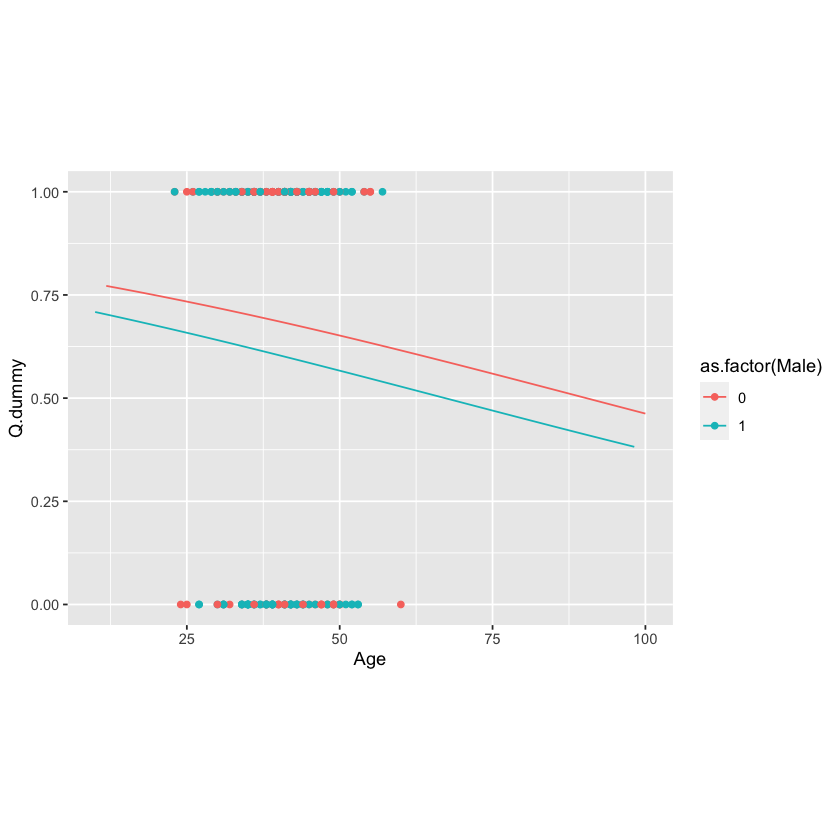

In [72]:
# Plot everything
p <- ggplot(stat16, aes(x=Age, y=Q.dummy, color=as.factor(Male))) 
p + geom_point() + 
  # geom_ribbon(data=new.data, aes( ymin=ymin, ymax=ymax, 
                                       # fill=as.factor(Male)), alpha=0.5) + 
  geom_line(data=new.data, aes(y=fit, colour=as.factor(Male))) +  theme(aspect.ratio = 0.75) +
  labs(x="Age", y="Q.dummy") 

In [47]:
require(MASS)
confint(m_logit)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-0.22745598,3.08271481
Age,-0.05494224,0.02332174
Male,-0.91193702,0.18337882


In [48]:
exp(confint.default(m_logit))

,2.5 %,97.5 %
(Intercept),0.7823148,21.158005
Age,0.9469441,1.023724
Male,0.4044388,1.206366


In [49]:
m_logit


Call:  glm(formula = Q.dummy ~ Age + Male, family = binomial(link = "logit"), 
    data = stat16)

Coefficients:
(Intercept)          Age         Male  
    1.40326     -0.01553     -0.35882  

Degrees of Freedom: 236 Total (i.e. Null);  234 Residual
Null Deviance:	    310.5 
Residual Deviance: 308.3 	AIC: 314.3

In [50]:
# install.packages("pROC")
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [52]:
dim(stat16)

[1] 237   5

In [53]:

# sample data frame
train_ind <-sample(seq_len(nrow(stat16)), size = 40)  

df_train <- stat16[train_ind, ]
df_test <-  stat16[-train_ind, ]

In [55]:
# fit logistic model
model <- glm(Q.dummy ~ Age + Male, data=df_train,
          family = binomial(link = "logit"))
 
# predicted data
prediction <- predict(model, df_test, 
                      type="response")
 
# create roc curve
roc_object <- roc( df_test$Q.dummy, prediction)
 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [59]:
roc_object


Call:
roc.default(response = df_test$Q.dummy, predictor = prediction)

Data: prediction in 71 controls (df_test$Q.dummy 0) < 126 cases (df_test$Q.dummy 1).
Area under the curve: 0.5246

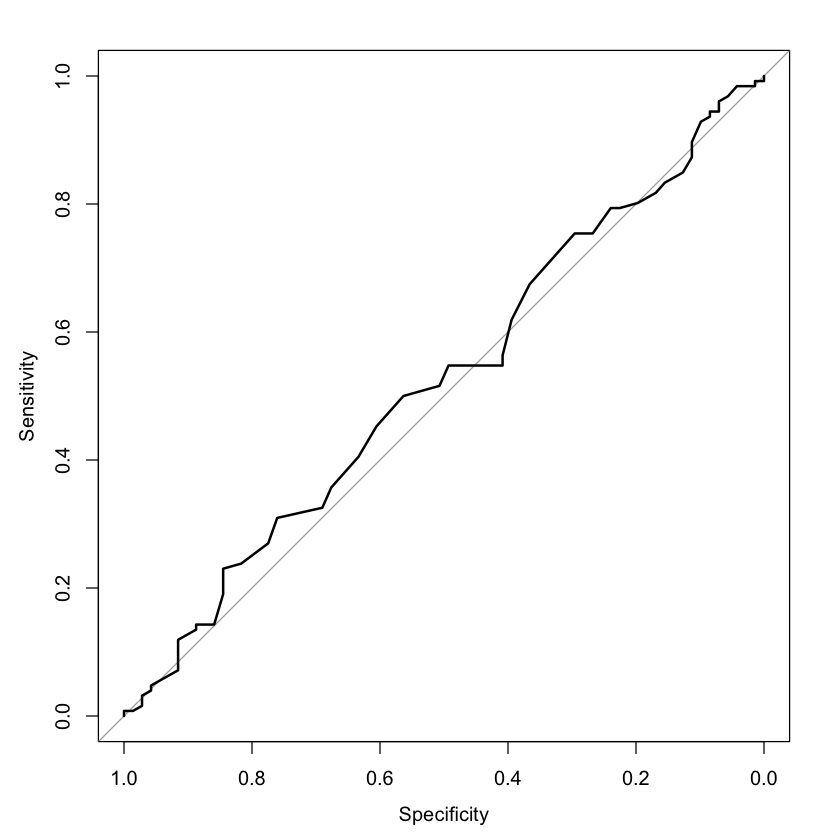

In [56]:
plot(roc_object)

In [58]:
# calculate area under curve
auc(roc_object)

Area under the curve: 0.5246

In [ ]:
data(mtcars)

## 75% of the sample size
smp_size <- floor(0.75 * nrow(mtcars))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(mtcars)), size = smp_size)

train <- mtcars[train_ind, ]
test <- mtcars[-train_ind, ]

### [An Application of Bootstrapping in Logistic Regression Model](https://www.researchgate.net/publication/308887932_An_Application_of_Bootstrapping_in_Logistic_Regression_Model)

Bootstrapping will only produce narrower confidence intervals when data do not met the model assumptions

More accurate standard errors, conﬁdence
intervals, and even hypothesis tests for more complex samples can be derived using these methods

Sometimes I have found bootstrapping to be of real practical value. If the results from asymptotic methods differ largely from results of bootstrapping, this indicates problem in the data. There might outliers in continuous data or very skewed distribution in categorical data or something else, but always something that needs to be understood. Examining the reason for this difference might lead you to valuable insight into the problem you analyze.

### [Bootstrapping Regression Models in R](https://socialsciences.mcmaster.ca/jfox/Books/Companion/appendices/Appendix-Bootstrapping.pdf)

In [ ]:
m_logit.boot <- Boot(m_logit, R=1999)
m_logit.boot

In [ ]:
hist(m_logit.boot, legend="separate")

In [ ]:
Confint(m_logit.boot, level=.95, type="norm")

Сравним с результатами, полученными ранее:

In [ ]:
confint(m_logit)

In [ ]:
tidy(m_logit)

In [ ]:
confint(m_logit)

In [ ]:
m_logit.boot <- Boot(m_logit, R=1999)

In [ ]:
tidy(m_logit)

In [ ]:
m_logit.boot

In [ ]:
Confint(m_logit.boot, level=.95, type="norm")

In [ ]:
confint(m_logit)

In [ ]:
hist(m_logit.boot, legend="separate")

We next use the dataEllipse() function from the car package to examine the joint distribution
of the bootstrapped income and education coefficients. The function draws a scatterplot of the
pairs of coefficients, with bivariate-normal concentration ellipses superimposed (Figure 2)

In [ ]:
dataEllipse(m_logit.boot$t[, 2], m_logit.boot$t[, 3],
xlab="c1", ylab="c2",
cex=0.3, levels=c(.5, .95, .99), robust=TRUE)